In [1590]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys
project_basedir = '..'
sys.path.append(project_basedir)
from config import conf
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [1591]:
validate_dirs = os.listdir(conf.validate_dir)
validate_dirs = [i for i in validate_dirs if i != '_blank']
validate_dirs = sorted(validate_dirs)
validate_dirs = [os.path.join(conf.validate_dir,i) for i in validate_dirs]

In [1592]:
def add_score(onedic,key,point):
    onedic.setdefault(key,0)
    onedic[key] += point
def cal_points(gameplays):
    point_dic = {}
    for onegame in gameplays:
        if onegame[-3:] != 'cbf':
            continue
        winner = onegame.split('_')[-1].split('.')[0]
        player1 = onegame.split('_')[-2].split('-')[0]
        player2 = onegame.split('_')[-2].split('-')[1]
        assert(winner in ['w','b','peace'])
        if winner == 'w':
            add_score(point_dic,player1,1)
            add_score(point_dic,player2,0)
        elif winner == 'b':
            add_score(point_dic,player1,0)
            add_score(point_dic,player2,1)
        elif winner == 'peace':
            add_score(point_dic,player1,0.5)
            add_score(point_dic,player2,0.5)
            add_score(point_dic,'peace',1)
        else:
            raise
    return point_dic

In [1593]:
game_numbers = [0]
game_numbers_identity = [0]
elu_points = [0]
validate_games = [0]
win_rate = [0]
dates = ['start']
peace_rates = [0]
delta_elo = [0]
for one_dir in validate_dirs:
    one_date = one_dir.split('/')[-1]
    gameplays = os.listdir(one_dir)
    pointcdic = cal_points(gameplays)
    game_num = len(gameplays)
    
    try:
        gn = len(os.listdir(os.path.join(conf.history_selfplay_dir,one_date.replace('_noup',''))))
    except:
        gn = 0
    game_numbers.append(game_numbers[-1] + gn)
    game_numbers_identity.append(gn)
    
    old_score = pointcdic.get('oldnet',0) / game_num
    peace_rate = pointcdic.get('peace',0) / game_num
    if old_score == 0:
        continue
    elo = np.log10(1 / old_score - 1) * 400
    if one_date >= '2018-08-27_22-13-25' and elo < 0:
        elo = 0
    elu_points.append(elu_points[-1] + elo)
    validate_games.append(len(gameplays))
    win_rate.append(1 - old_score)
    dates.append(one_date)
    peace_rates.append(peace_rate)
    delta_elo.append(elo)

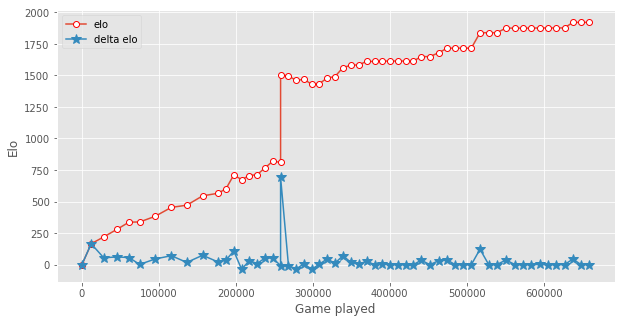

In [1594]:
plt.figure(figsize=(10,5))
plt.plot(game_numbers,elu_points,marker='o',mec='r',mfc='w',label='elo')
plt.plot(game_numbers,delta_elo,marker='*',ms=10,label='delta elo')
plt.legend()
plt.xlabel("Game played")
plt.ylabel("Elo")

In [1595]:
pd.DataFrame({
    'dates':dates,
    'game_numbers':game_numbers,
    'game_numbers_identity':game_numbers_identity,
    'elu_points':elu_points,
    'validate_games':validate_games,
    'win_rate':win_rate,
    'peace_rates':peace_rates,
    'delta_elo':delta_elo,
    '上位情况':[('pending' if i == 0 else "上位") for i in delta_elo]
})[-10:]

,dates,delta_elo,elu_points,game_numbers,game_numbers_identity,peace_rates,validate_games,win_rate,上位情况
48,2018-09-14_18-13-25_noup,0.000000,1874.778249,562775,11615,0.041841,239,0.489540,pending
49,2018-09-14_22-20-25_noup,0.000000,1874.778249,573061,10286,0.033898,236,0.436441,pending
50,2018-09-15_00-20-25_noup,0.000000,1874.778249,583815,10754,0.033613,238,0.474790,pending
51,2018-09-15_02-20-25_noup,1.459822,1876.238071,594717,10902,0.029412,238,0.502101,上位
52,2018-09-15_04-20-25_noup,0.000000,1876.238071,605515,10798,0.021097,237,0.466245,pending
53,2018-09-15_06-10-25_noup,0.000000,1876.238071,616268,10753,0.016736,239,0.456067,pending
54,2018-09-15_08-00-25_noup,0.000000,1876.238071,627177,10909,0.033473,239,0.485356,pending
55,2018-09-15_10-00-26_noup,44.216366,1920.454438,638022,10845,0.021097,237,0.563291,上位
56,2018-09-15_12-00-25_noup,0.000000,1920.454438,648699,10677,0.016736,239,0.489540,pending
57,2018-09-15_14-00-25_noup,0.000000,1920.454438,659270,10571,0.000000,54,0.425926,pending


In [1596]:
!ls -l ../data/distributed/ | wc -l 

2497


In [1597]:
!ls -l ../data/distributed/ | grep peace | wc -l

1


In [1598]:
! date

2018年 09月 15日 星期六 14:28:24 CST


In [1599]:
list(range(1,2))

[1]